In [1]:
# Lockdown Mania

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Algorithm
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Importing training dataset
df_train = pd.read_csv('coronaTrain.csv')
X_train = df_train.iloc[:,1:1001]
Y_train = df_train.iloc[:, -1]

#importing test dataset
df_test = pd.read_csv('coronaTest.csv')
X_test = df_test.iloc[:,1:1001]

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
# Random Forest on training set
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

100.0


In [6]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_rf = cross_val_score(random_forest, X = X_train, y = Y_train, cv = 10,scoring='accuracy')
print(accuracies_rf.mean())
print(accuracies_rf.std())

0.8896593619558736
0.02324770649218263


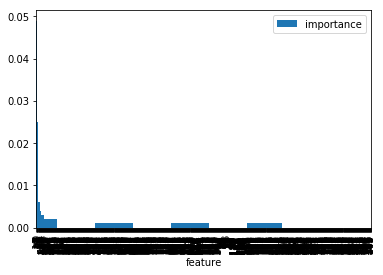

In [7]:
# Feature Importances
importances = pd.DataFrame({'feature':pd.DataFrame(X_train).columns,
                            'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [8]:
# Taking features with importance>= 0.2%
important_features=[]
for i in range(len(importances)):
    if importances['importance'][i]>=0.002:
        important_features.append(i)
print(important_features)
print(len(important_features))

[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 13, 15, 16, 20, 21, 23, 27, 28, 32, 34, 35, 37, 41, 44, 53, 58, 60, 61, 64, 74, 77, 99, 118, 128, 131, 144, 160, 169, 175, 176, 181, 272, 278, 280, 284, 299, 327, 378, 433, 449, 476, 522, 535, 537, 570, 595, 658, 692, 696, 697, 703, 711, 721, 722, 742, 750, 755, 782, 790, 803, 808, 819, 823, 831, 849, 851, 876, 948, 977, 985]
80


In [9]:
# Training and test dataset with only important features
X_train = pd.DataFrame(X_train).iloc[:,important_features]
Y_train = pd.DataFrame(Y_train).iloc[:, -1]
X_test = pd.DataFrame(X_test).iloc[:,important_features]

In [11]:
# Shape of modified datasets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1287, 80)
(1287,)
(1332, 80)


In [12]:
# Applying k-Fold Cross Validation again
from sklearn.model_selection import cross_val_score
accuracies_rf = cross_val_score(random_forest, X = X_train, y = Y_train, cv = 10,scoring='accuracy')
print(accuracies_rf.mean())
print(accuracies_rf.std())

0.9254155485986881
0.02717300943637244


In [13]:
# Hyper-parameter Tuning
parameters = { "criterion" : ["gini", "entropy"], 
               'max_depth': [30,45,70, 100 ,None],
               'min_samples_leaf': [1, 2, 4],
               "min_samples_split" : [2,5,10], 
               "n_estimators": [400, 700, 1000,1500,2000]}
from sklearn.model_selection import GridSearchCV, cross_val_score
random_forest = RandomForestClassifier(n_estimators=100, 
                            random_state=1, 
                            n_jobs=-1)
clf = GridSearchCV(estimator=random_forest, 
                   param_grid=parameters, 
                   scoring='accuracy',
                   n_jobs=-1)
clf.fit(X_train, Y_train)
print(clf.best_params_)
print(clf.best_score_)

C:\Users\Mahabub M Khan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
0.9308469308469308


In [14]:
# Random Forest with new parameters
random_forest = RandomForestClassifier(criterion = "gini", 
                                       max_depth = 30 , 
                                       min_samples_leaf=1,
                                       min_samples_split = 2,   
                                       n_estimators=1000, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [15]:
# prediction
Y_pred = random_forest.predict(X_test)

In [16]:
# Exporting prediction file
pd.DataFrame(Y_pred).to_csv('CovidPrediction.csv')

In [17]:
# The End